# Model for predicting USU Men's Basketball Outcome

### Steps:
1. Data Analysis
2. Data Visualization
3. Data Splitting
4. Models
5. Tuning
6. Evaluation

## Imports

In [79]:


# Data Handling and Analysis
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Tools
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb

# Model Evaluation and Optimization
from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate, validation_curve, RandomizedSearchCV
)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import reciprocal, randint

# Pipeline Construction
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

### Load Data

In [80]:
dataset_df = pd.read_csv('data/combined_merged_stats_all_teams_updated.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (571, 119)


## Data Exploration

In [81]:
dataset_df.head()

,rank,team,conf,record,adjoe,oe Rank,adjde,de Rank,barthag,rank.1,...,USU_TORD,USU_ORB,USU_DRB,USU_FTR,USU_FTRD,USU_2P_O,USU_2P_D,USU_3P_O,USU_3P_D,USU_ADJ_T
0,202,Idaho,WAC,11-18,109.635748,57,112.924009,332,0.415847,202,...,15.0,37.4,27.0,40.5,30.7,51.6,46.0,35.3,33.8,61.8
1,209,Mount St. Mary's,NEC,18-14,102.351783,168,105.883279,249,0.403694,209,...,15.0,37.4,27.0,40.5,30.7,51.6,46.0,35.3,33.8,61.8
2,309,Texas A&M Corpus Chris,Slnd,5-23,96.127881,278,110.899246,315,0.161943,309,...,15.0,37.4,27.0,40.5,30.7,51.6,46.0,35.3,33.8,61.8
3,76,Weber St.,BSky,28-7,108.777978,66,98.686302,111,0.753928,76,...,15.0,37.4,27.0,40.5,30.7,51.6,46.0,35.3,33.8,61.8
4,72,Santa Clara,WCC,24-12,110.103495,52,99.533938,125,0.761442,72,...,15.0,37.4,27.0,40.5,30.7,51.6,46.0,35.3,33.8,61.8


In [82]:
dataset_df.describe()

,rank,adjoe,oe Rank,adjde,de Rank,barthag,rank.1,proj. W,Proj. L,Pro Con W,...,USU_TORD,USU_ORB,USU_DRB,USU_FTR,USU_FTRD,USU_2P_O,USU_2P_D,USU_3P_O,USU_3P_D,USU_ADJ_T
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,150.670753,104.722576,154.623468,102.261803,154.469352,0.553957,150.670753,16.751473,14.751154,8.537813,...,16.581763,29.136778,25.961094,34.197568,31.336778,51.409422,46.872948,36.835258,33.766869,66.812158
std,85.184033,6.409625,91.260472,5.106763,88.406678,0.217348,85.184033,6.355820,4.827281,3.863393,...,1.879601,4.697471,3.479321,3.229805,2.587214,2.869021,2.702635,2.207672,1.818879,2.454831
min,2.000000,88.133201,3.000000,87.901683,2.000000,0.050090,2.000000,0.000000,3.000000,0.000000,...,12.400000,21.700000,21.300000,28.900000,26.100000,46.800000,42.200000,33.600000,29.900000,61.800000
25%,81.500000,100.496338,83.000000,98.740017,83.000000,0.385169,81.500000,12.000000,11.000000,6.000000,...,15.800000,25.400000,22.900000,33.200000,29.100000,49.200000,46.000000,35.300000,33.000000,64.100000
50%,142.000000,105.350864,139.000000,102.217850,138.000000,0.554772,142.000000,17.000000,15.000000,9.000000,...,17.000000,27.400000,26.400000,33.700000,33.200000,51.600000,46.300000,36.000000,34.500000,68.000000
75%,215.500000,108.916089,229.500000,105.927516,220.000000,0.735669,215.500000,21.000000,18.000000,12.000000,...,17.600000,32.300000,27.000000,36.400000,33.600000,54.200000,48.800000,38.000000,35.200000,68.600000
max,351.000000,121.923826,350.000000,116.115624,351.000000,0.966030,351.000000,35.000000,28.000000,18.000000,...,19.700000,37.400000,34.000000,40.500000,34.300000,56.200000,50.700000,40.900000,36.000000,69.600000


In [83]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Columns: 119 entries, rank to USU_ADJ_T
dtypes: float64(94), int64(15), object(10)
memory usage: 531.0+ KB


***Check for null values***

In [84]:
dataset_df.isnull().sum().sort_values(ascending=False)

USU_ADJ_T      242
ADJ_T          242
EFG_O          242
EFG_D          242
TOR            242
              ... 
ConPA            0
ConPF            0
FUN              0
Qual Games       0
USU_Proj. L      0
Length: 119, dtype: int64

## Data Visualization

<Axes: >

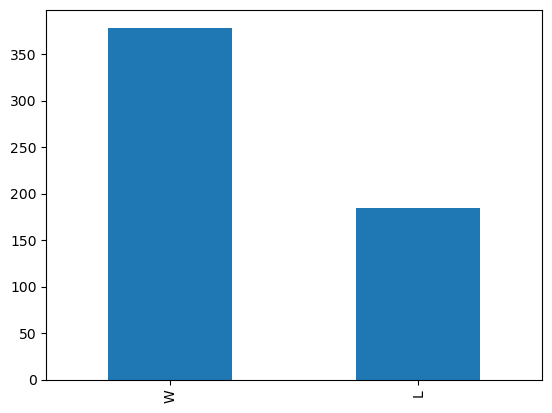

In [85]:
plot_df = dataset_df['Win/Loss'].value_counts()
plot_df.plot(kind='bar')

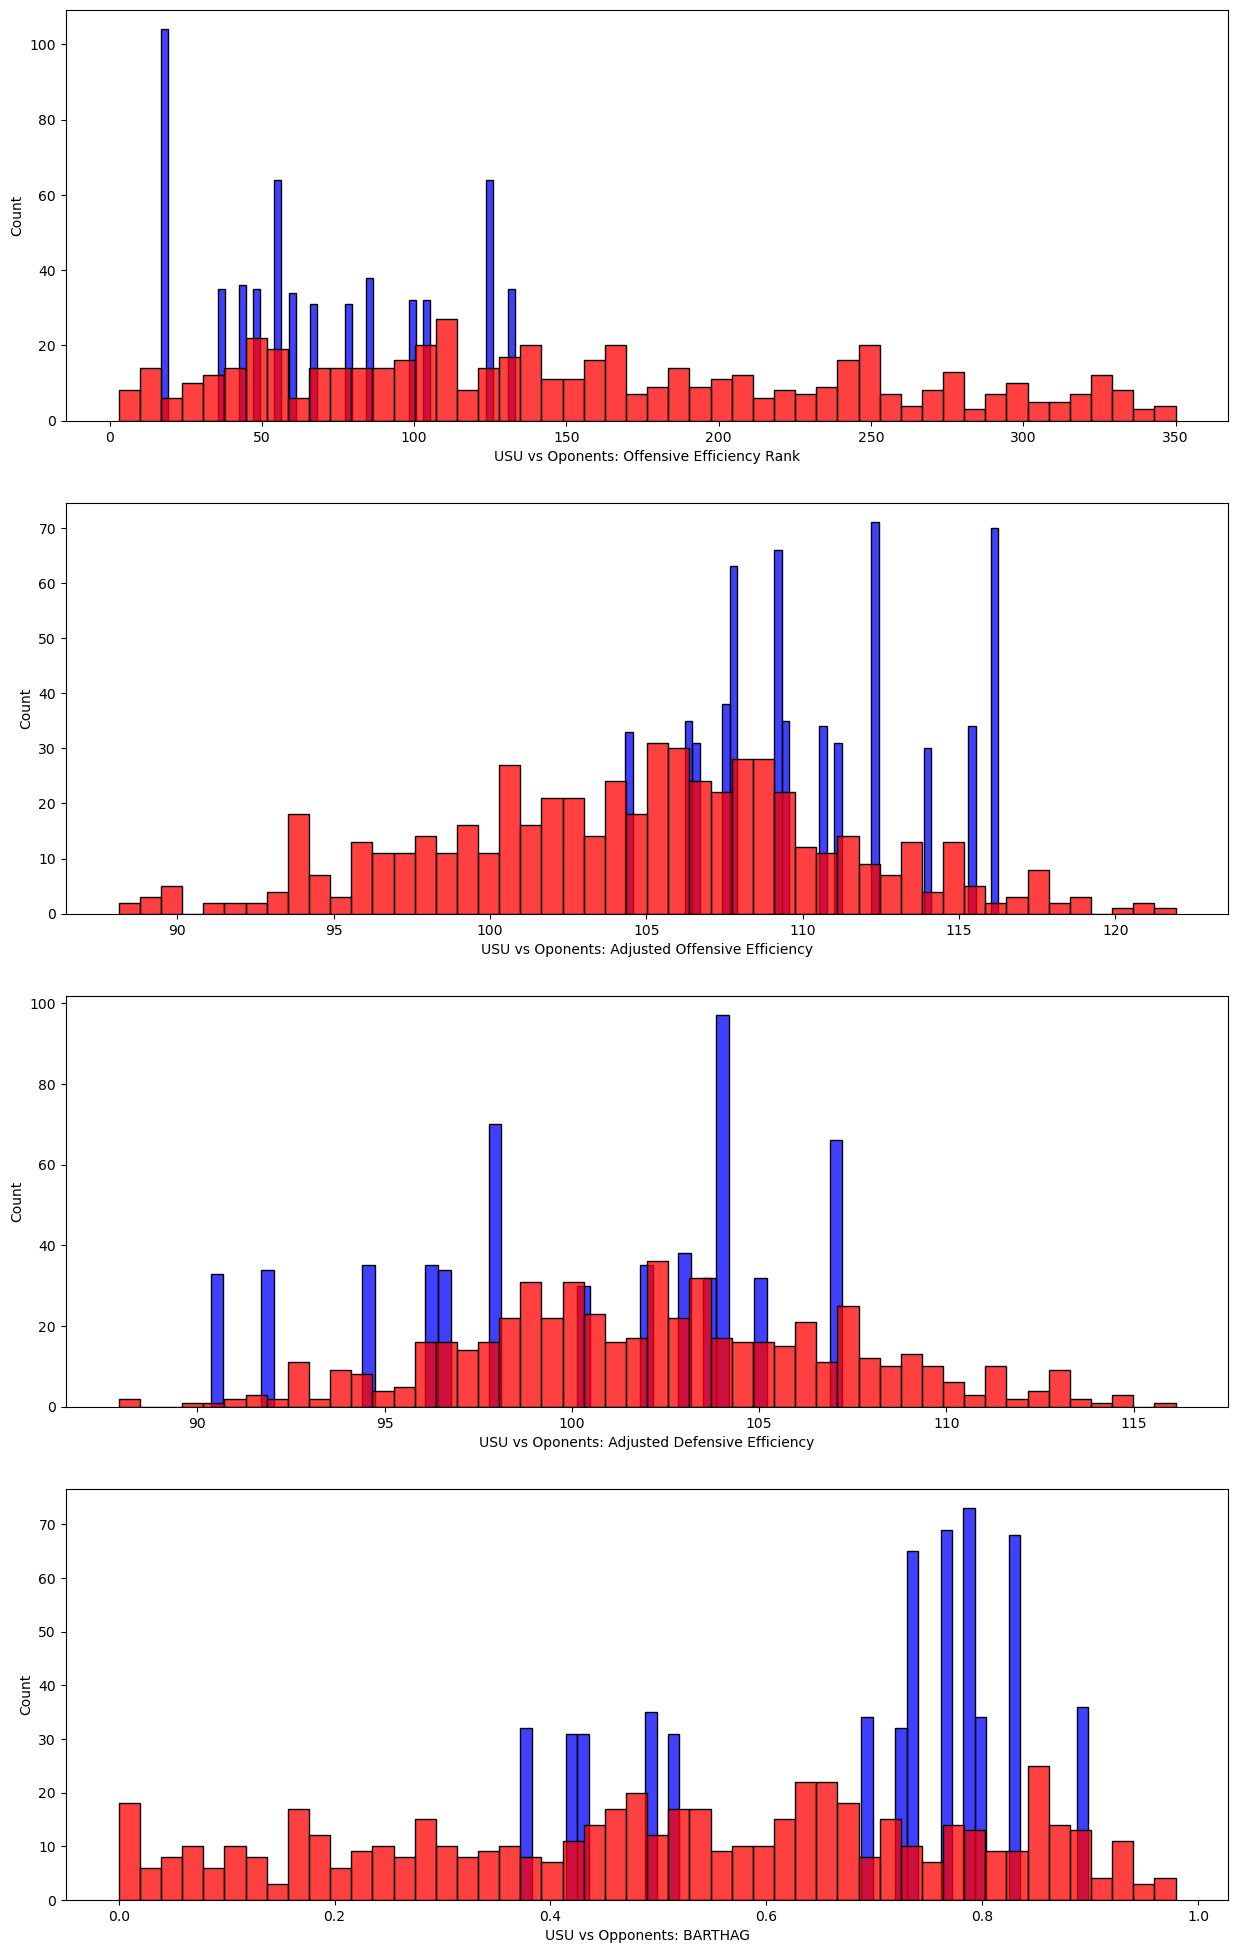

In [86]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))  # Adjusted to 3x1 grid
plt.subplots_adjust(top=2)

# Plotting and setting x-axis labels
sns.histplot(dataset_df['USU_oe Rank'], color='b', bins=50, ax=ax[0])
ax[0].set_xlabel('USU vs Oponents: Offensive Efficiency Rank')

sns.histplot(dataset_df['USU_adjoe'], color='b', bins=50, ax=ax[1])
ax[1].set_xlabel('USU vs Oponents: Adjusted Offensive Efficiency')

sns.histplot(dataset_df['USU_adjde'], color='b', bins=50, ax=ax[2])
ax[2].set_xlabel('USU vs Oponents: Adjusted Defensive Efficiency')

sns.histplot(dataset_df['USU_Qual Barthag'], color='b', bins=50, ax=ax[3])
ax[3].set_xlabel('USU vs Opponents: BARTHAG')
# Overlaying plots on the same axes
sns.histplot(dataset_df['oe Rank'], color='r', bins=50, ax=ax[0])
sns.histplot(dataset_df['adjoe'], color='r', bins=50, ax=ax[1])
sns.histplot(dataset_df['adjde'], color='r', bins=50, ax=ax[2])
sns.histplot(dataset_df['Qual Barthag'], color='r', bins=50, ax=ax[3])

plt.show()




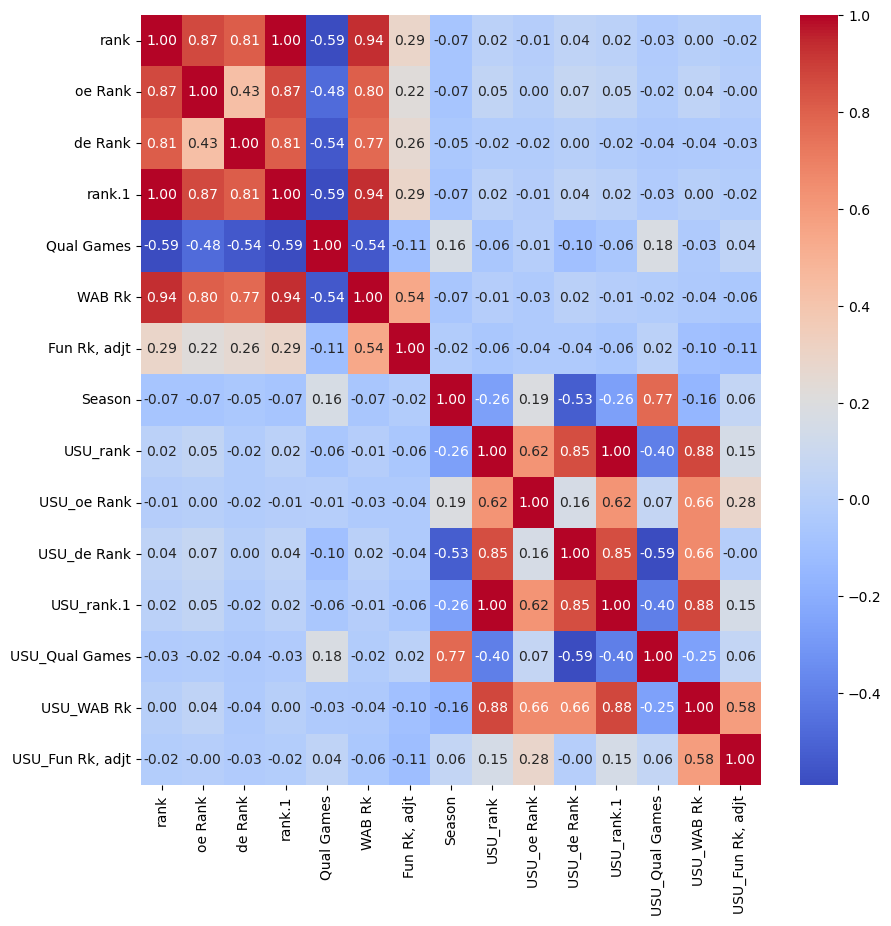

In [87]:
numeric_features = dataset_df.select_dtypes(include=[int]).columns.tolist()

# Convert 'Win/Loss' to numeric (1 for Win, 0 for Loss)

# Add 'Win/Loss_numeric' to the list of numeric features


# Create a new DataFrame with only the numeric features and 'Win/Loss_numeric'
df_numeric = dataset_df[numeric_features]

# Create a correlation matrix that includes 'Win/Loss_numeric'
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


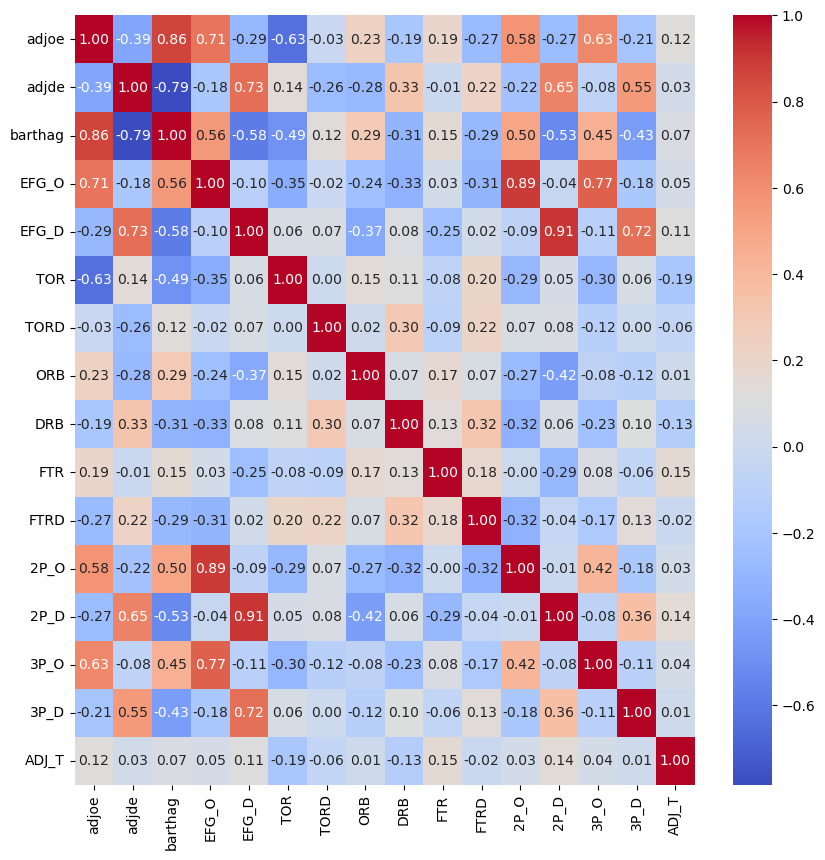

In [93]:
percentage_and_efficiency_features = ['adjoe', 'adjde', 'barthag','EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T']


# Convert 'Win/Loss' to numeric (1 for Win, 0 for Loss)

# Add 'Win/Loss_numeric' to the list of numeric features

# Create a new DataFrame with only the numeric features and 'Win/Loss_numeric'
df_pe = dataset_df[percentage_and_efficiency_features]

# Create a correlation matrix that includes 'Win/Loss_numeric'
correlation_matrix = df_pe.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


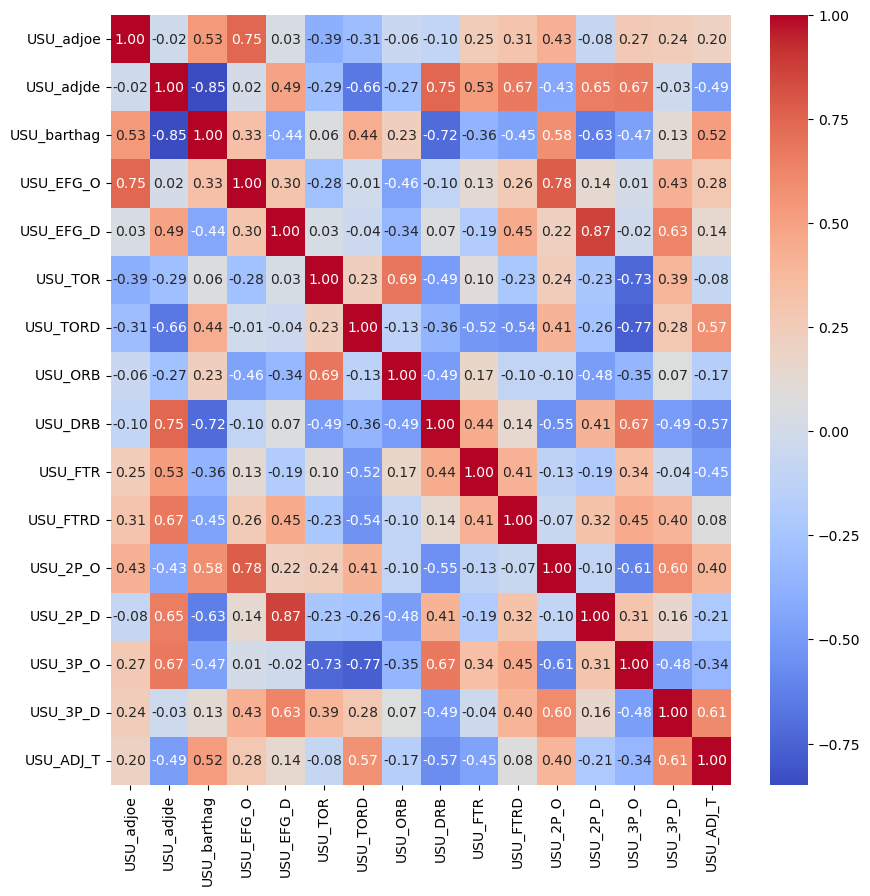

In [95]:
extended_features = [f'USU_{feature}' for feature in percentage_and_efficiency_features]

df_extended = dataset_df[extended_features]

correlation_matrix = df_extended.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()